# Phase 2: Exploratory Data Analysis (EDA)


In [3]:
# Import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# Set up graphs
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 10

In [5]:
# Upload dataset
data = pd.read_csv('/Users/AndreaLopera/Documents/GitHub/Production-Line-Intelligence-Rework-Risk-Modeling/data/production_with_qc.csv') 
data.head()

,prod_timestamp,unit_id,shift,machine_id,product_type,product_category,cutting_time,tempering_time,framing_time,qc_result,rework_flag,downtime_minutes,rework_reason
0,2025-01-01 06:00:00,G-000001,Shift 1,M01,Custom,Flooring,13.21,10.00,59.27,Pass,0,1,NaN
1,2025-01-01 06:00:00,G-000002,Shift 1,M01,Custom,Flooring,14.70,9.12,62.67,Pass,0,1,NaN
2,2025-01-01 06:00:00,G-000003,Shift 1,M01,Standard,Stairs,2.67,9.14,21.46,Pass,0,1,NaN
3,2025-01-01 06:00:00,G-000004,Shift 1,M01,Custom,Walls,6.09,9.36,37.67,Fail,1,23,Machine Malfunction
4,2025-01-01 06:00:00,G-000005,Shift 1,M01,Standard,Partitions,1.14,5.54,5.46,Pass,0,0,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54720 entries, 0 to 54719
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   prod_timestamp    54720 non-null  object 
 1   unit_id           54720 non-null  object 
 2   shift             54720 non-null  object 
 3   machine_id        54720 non-null  object 
 4   product_type      54720 non-null  object 
 5   product_category  54720 non-null  object 
 6   cutting_time      54720 non-null  float64
 7   tempering_time    54720 non-null  float64
 8   framing_time      54720 non-null  float64
 9   qc_result         54720 non-null  object 
 10  rework_flag       54720 non-null  int64  
 11  downtime_minutes  54720 non-null  int64  
 12  rework_reason     15609 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 5.4+ MB


**Observation:** The dataset has a total of 54,720 data points, 14 features, and a total of 48,495 null values in the feature "rework_reason."

In [7]:
data['rework_reason'].count()

np.int64(15609)

In [8]:
data.describe()

,cutting_time,tempering_time,framing_time,rework_flag,downtime_minutes
count,54720.000000,54720.000000,54720.000000,54720.000000,54720.000000
mean,6.183395,8.987213,31.999004,0.285252,12.465588
std,4.944824,1.499685,20.749450,0.451539,18.482643
min,-0.160000,2.690000,1.100000,0.000000,0.000000
25%,0.940000,7.980000,8.420000,0.000000,1.000000
50%,3.975000,8.990000,29.585000,0.000000,2.000000
75%,10.790000,10.000000,49.590000,1.000000,25.000000
max,20.130000,14.670000,79.050000,1.000000,60.000000


**Observations:**
- On average, the cutting time is 6.18
- On average, the tempering time is 8.98
- On average, framing time is 31.99
- Although the average tempering time is higher, its standard deviation is lower, 2.98, compared to the one for cutting and framing, 4.36 and 4.54, respectively.
- The highest cumulative downtime is 8362 minutes ~ 139.36 hours.

## Process Evaluation

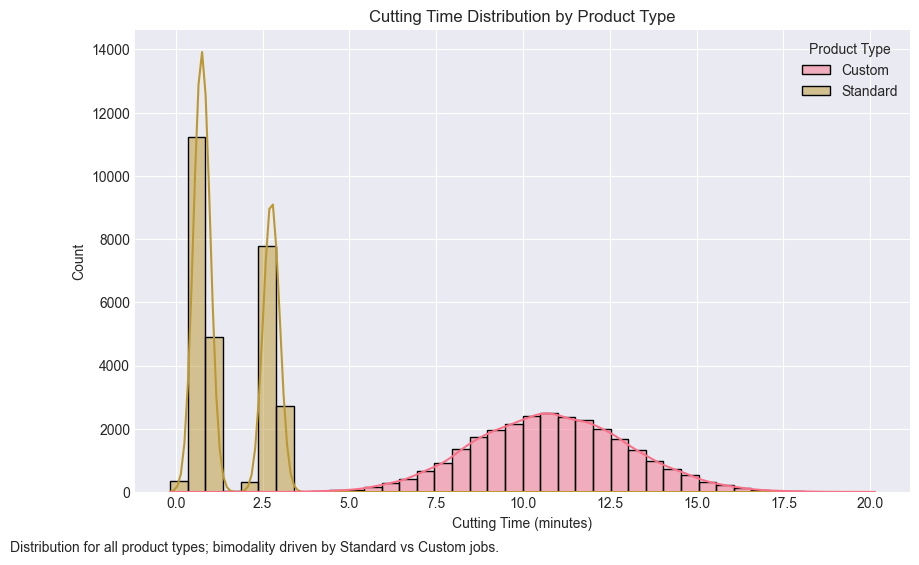

In [9]:
# Cutting Time Distribution
ax = sns.histplot(
    data=data, 
    x='cutting_time', 
    hue='product_type',
    bins=40, 
    kde=True,
    common_norm=False
)
ax.legend_.set_title('Product Type')
plt.title('Cutting Time Distribution by Product Type')
plt.xlabel('Cutting Time (minutes)')
plt.figtext(0, 0.01, "Distribution for all product types; bimodality driven by Standard vs Custom jobs.")
plt.show()

Observations: The strong bimodal distribution tell us how different "Standard" cutting behaves (left bump ~0-3 min) from "Custom" cutting (~8-15 min).

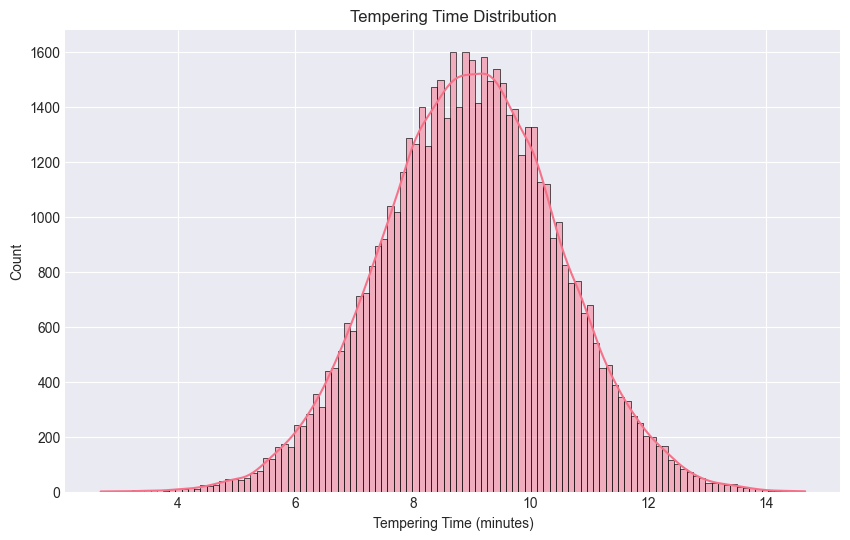

In [10]:
# Tempering Time Distribution 
sns.histplot(data=data, x='tempering_time', kde=True)
plt.title('Tempering Time Distribution')
plt.xlabel("Tempering Time (minutes)")
plt.show()

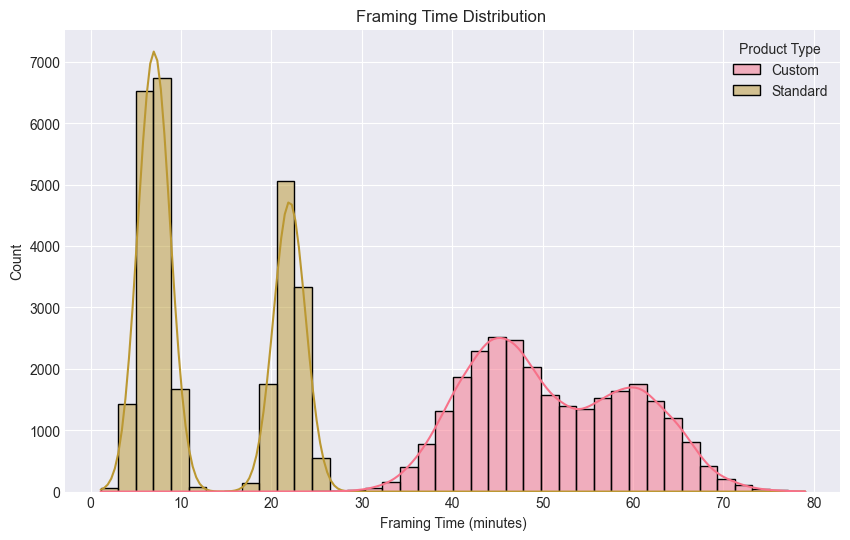

In [11]:
# Framing Time Distribution 
ax = sns.histplot(
    data=data, 
    x='framing_time', 
    hue='product_type',
    bins=40,
    common_norm=False, 
    kde=True
)
ax.legend_.set_title('Product Type')
plt.title('Framing Time Distribution ')
plt.xlabel('Framing Time (minutes)')
plt.show()

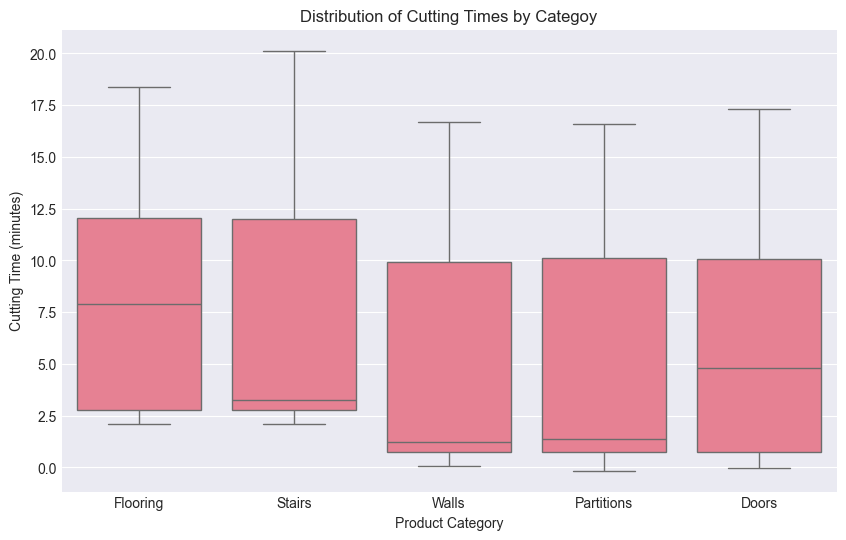

In [12]:
# Compare. distributions
sns.boxplot(data, x='product_category', y='cutting_time')
plt.title('Distribution of Cutting Times by Categoy')
plt.xlabel('Product Category')
plt.ylabel('Cutting Time (minutes)')
plt.show()


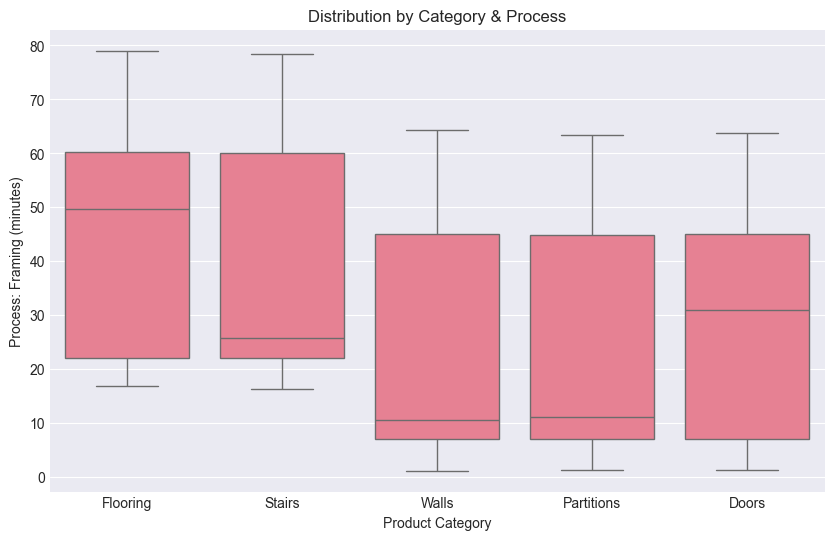

In [13]:
# Compare distributions
sns.boxplot(data, x='product_category', y='framing_time')
plt.title('Distribution by Category & Process')
plt.xlabel('Product Category')
plt.ylabel('Process: Framing (minutes)')
plt.show()

**Observation:** Glasses for either flooring or stairs take longer to cut and frame. 

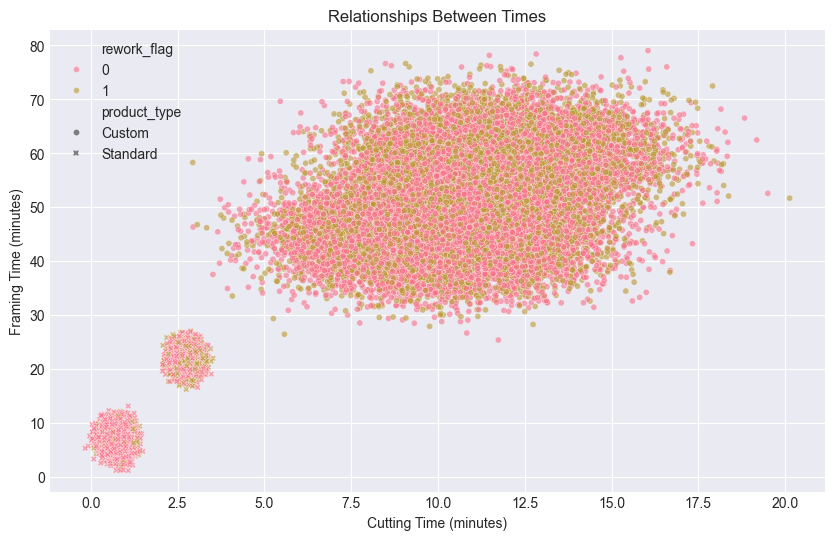

In [14]:
ax = sns.scatterplot(
    data, 
    x='cutting_time', 
    y='framing_time', 
    hue='rework_flag', 
    style='product_type',
    alpha=0.6,
    s=20
)
plt.title('Relationships Between Times')
plt.xlabel('Cutting Time (minutes)')
plt.ylabel('Framing Time (minutes)')
plt.show()

**Observations:**

We can see three different clusters. 
- The bottom left between ~0 and 1.5 minutes, cutting, and ~0 to 13 minutes, framing, which corresponds to the Standard simple jobs. Where the presence of rework flags is minimal.
- The middle one between ~2.0 and 3.0 minutes, cutting and ~18 to 26 minutes, framing, still Standard, but a bit more involved jobs. Here, rework flags (1) are almost aligned with no rework flags (0).
- The big cluster: Custom heavy cutting and framing jobs.

We can also identify a strong positive relationship between cutting and framing.

There is a higher concentration of rework in the big cluster: hard region.

In [15]:
# Rework rate by shift
# Table 
rework_rate = data.groupby('shift').agg(
    total_units = ('unit_id', 'count'), 
    reworked_units = ('rework_flag', 'sum'), 
    rework_rate = ('rework_flag', lambda x: x.mean() * 100),
    ).reset_index()

# Sort the table by reworked_units in descending order
rework_rate = rework_rate.sort_values('reworked_units', ascending=False)

# Calculate the cummulative % of reworked units
rework_rate['cumpercentage'] = (
    rework_rate['reworked_units'].cumsum()/
    rework_rate['reworked_units'].sum() * 100
)
rework_rate

,shift,total_units,reworked_units,rework_rate,cumpercentage
2,Shift 3,18240,5701,31.255482,36.523800
1,Shift 2,18240,5102,27.971491,69.210071
0,Shift 1,18240,4806,26.348684,100.000000


**Observations:**
We can see that the third shift which corresponds to the nigth (10:00 PM to 06:00 AM) has the highest rework rate.

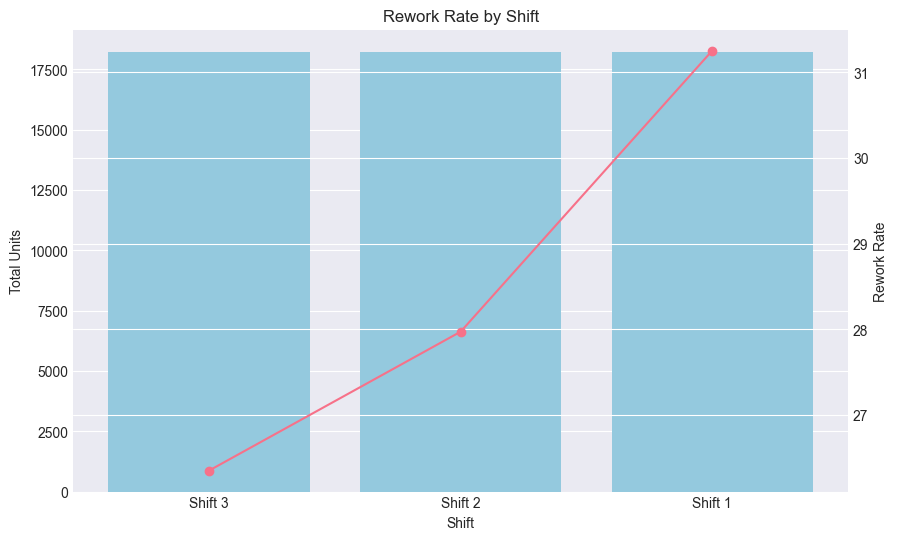

In [16]:
# Rework rate by shift
# Pareto Chart
fig, ax1 = plt.subplots()

# Bar chart 
sns.barplot(data=rework_rate, x='shift', y='total_units', ax=ax1, color='skyblue')
for container in ax.containers:
    ax1.bar_label(container, fmt='%1.1f%%', label_type='edge')
plt.ylabel('Total Units')
plt.xlabel('Shift')

# 
ax2 = ax1.twinx()
ax2.plot(rework_rate['rework_rate'], marker='o', linestyle='-')
plt.title('Rework Rate by Shift')
plt.xticks(rotation=0)
plt.ylabel('Rework Rate')

plt.show()

## Quality

In [17]:
# Average downtime by product category
# Table
avg_downtime = data.groupby('product_category')['downtime_minutes'].mean().reset_index()
avg_downtime

,product_category,downtime_minutes
0,Doors,9.982827
1,Flooring,16.486561
2,Partitions,9.928197
3,Stairs,16.083942
4,Walls,9.870027


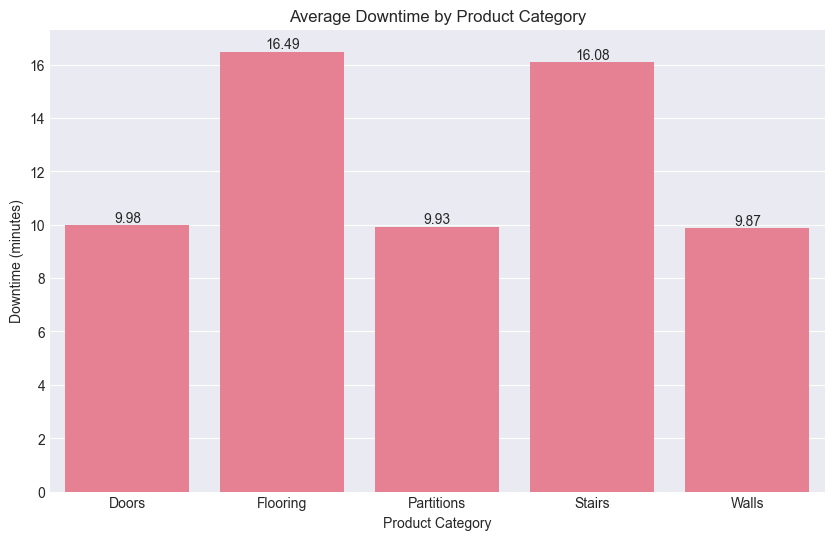

In [18]:
# Average downtime by product category
# Graph
ax = sns.barplot(data=avg_downtime, x='product_category', y='downtime_minutes')
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge')
plt.title('Average Downtime by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Downtime (minutes)')
plt.show()

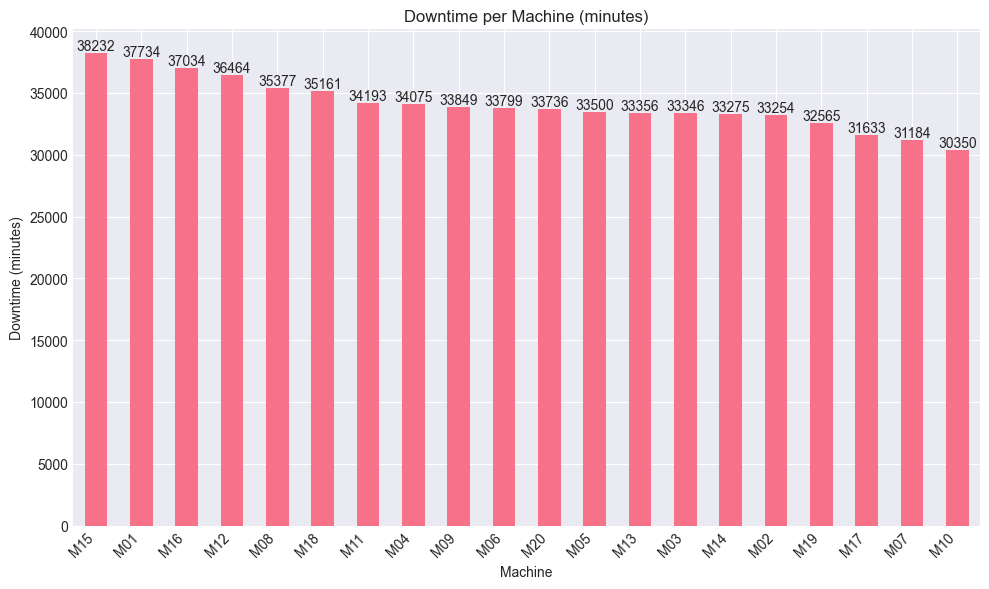

In [19]:
# Downtime by machine
downtime_machine = data.groupby('machine_id')['downtime_minutes'].sum()
# Graph
ax = downtime_machine.sort_values(ascending=False).plot(kind='bar')
for container in ax.containers:
    ax.bar_label(container, label_type='edge')
plt.title("Downtime per Machine (minutes)")
plt.xlabel("Machine")
plt.ylabel("Downtime (minutes)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

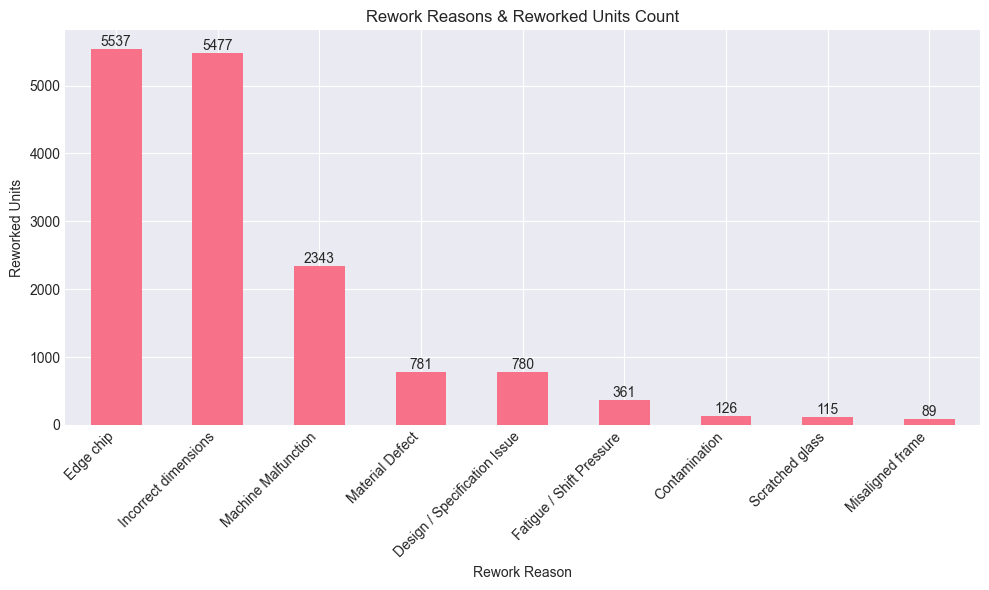

In [20]:
# Rework Reasons Distribution
# Create a Series with index=reason and value=count
rework_counts = data.groupby('rework_reason')['shift'].count()
# Graph
ax = rework_counts.sort_values(ascending=False).plot(kind='bar')
for container in ax.containers:
    ax.bar_label(container, label_type='edge')
plt.title("Rework Reasons & Reworked Units Count")
plt.xlabel("Rework Reason")
plt.ylabel("Reworked Units")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


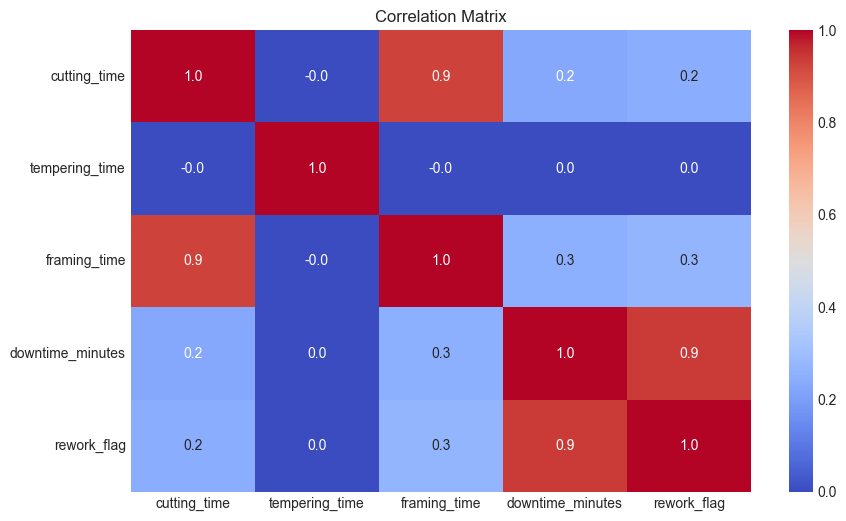

In [21]:
# Correlation matrix
corr_data = data[['cutting_time', 'tempering_time', 'framing_time', 'downtime_minutes', 'rework_flag']]
correlation_matrix = corr_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Correlation Matrix')
plt.show()

**Observations:**
- cutting_time and framing_time have a very strong correlation (0.9). Keeping both of them for the ML model will be redundant.
- There is a moderate positive correlation between framing/cutting time and rework_flag (0.3 and 0.2). It could be that longer, more complex jobs fail often.
- Tempering time has a value of around 0 with everything, meaning that tempering does not appear to drive rework risk.
- downtime_minutes and rework_flag have a very strong correlation; expected since a longer downtime session indicates a rework situation. Keeping both of them for the ML model will be redundant.

# Phase 3: Feature Engineering

In [22]:
# Average cycle time
# Table 
data['cycle_time'] = data['cutting_time']+ data['tempering_time']+ data['framing_time']
cycle_by_category = data.groupby('product_category')['cycle_time'].mean().reset_index()
cycle_by_category

,product_category,cycle_time
0,Doors,40.437387
1,Flooring,57.862522
2,Partitions,40.278364
3,Stairs,57.243782
4,Walls,40.089102


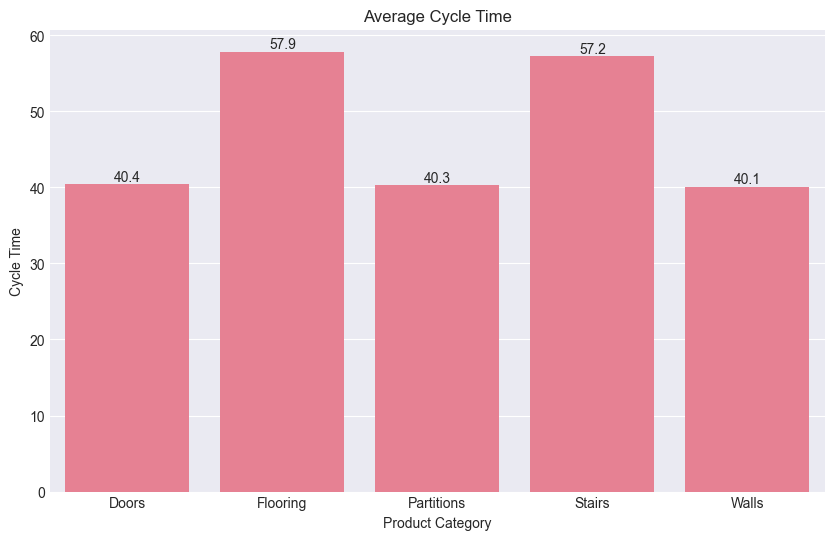

In [23]:
# Average cycle time
# Graph
ax = sns.barplot(data=cycle_by_category, x="product_category", y="cycle_time")
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge')
plt.title("Average Cycle Time")
plt.xlabel("Product Category")
plt.ylabel("Cycle Time")
plt.show()

In [24]:
# Replace nulls in the rework_reason feature with "None", since these are pieces that passed the quality audit 
data['rework_reason'].fillna('None', inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54720 entries, 0 to 54719
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   prod_timestamp    54720 non-null  object 
 1   unit_id           54720 non-null  object 
 2   shift             54720 non-null  object 
 3   machine_id        54720 non-null  object 
 4   product_type      54720 non-null  object 
 5   product_category  54720 non-null  object 
 6   cutting_time      54720 non-null  float64
 7   tempering_time    54720 non-null  float64
 8   framing_time      54720 non-null  float64
 9   qc_result         54720 non-null  object 
 10  rework_flag       54720 non-null  int64  
 11  downtime_minutes  54720 non-null  int64  
 12  rework_reason     54720 non-null  object 
 13  cycle_time        54720 non-null  float64
dtypes: float64(4), int64(2), object(8)
memory usage: 5.8+ MB


/var/folders/3r/j1sry0s50fq0m8378_651ssh0000gn/T/ipykernel_88402/3253834001.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['rework_reason'].fillna('None', inplace=True)


In [25]:
# Extract production_month
data['prod_timestamp'] = pd.to_datetime(data['prod_timestamp'])
data['production_month'] = data['prod_timestamp'].dt.month
data.tail()


,prod_timestamp,unit_id,shift,machine_id,product_type,product_category,cutting_time,tempering_time,framing_time,qc_result,rework_flag,downtime_minutes,rework_reason,cycle_time,production_month
54715,2025-06-01 22:00:00,G-054716,Shift 3,M20,Custom,Doors,11.50,9.22,39.11,Fail,1,51,Incorrect dimensions,59.83,6
54716,2025-06-01 22:00:00,G-054717,Shift 3,M20,Standard,Flooring,2.53,9.09,24.87,Fail,1,25,Incorrect dimensions,36.49,6
54717,2025-06-01 22:00:00,G-054718,Shift 3,M20,Standard,Partitions,0.60,9.68,6.07,Pass,0,0,None,16.35,6
54718,2025-06-01 22:00:00,G-054719,Shift 3,M20,Custom,Doors,10.06,7.88,39.65,Pass,0,1,None,57.59,6
54719,2025-06-01 22:00:00,G-054720,Shift 3,M20,Standard,Partitions,0.79,9.90,6.90,Pass,0,1,None,17.59,6


# Phase 4: Modeling
The whole idea is to create multiple models to answer the following questions:

**1. What is our rework risk?**

Train classification models (Logistic Regression /Random Forest) to predict rework flag from process times and product attributes.

**2. If a unit fails QC, what is the most likely root cause?**

Train classification models (Logistic Regression /Random Forest) to predict rework reasons from process times and product attributes.

## 1. Predicting Rework Flag

### 1.1. Model 1 Logistic Regression

In [23]:
# 1. Select features
model_data = data[['cycle_time',
                   'rework_flag',
                   'shift',
                   'machine_id',
                   'product_type',
                   'product_category',
                   'production_month']]

# 2. One-hot encode categoricals
data_encoded = pd.get_dummies(model_data, drop_first=True)

# 3. Split X / y
y = data_encoded['rework_flag'].copy()
X = data_encoded.drop(columns=['rework_flag'])

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

# 4. Model instance (more iterations to ensure convergence)
logreg = LogisticRegression(max_iter=1000, solver='lbfgs')

# 5. Train
logreg.fit(X_train, y_train)

# 6. Predict
y_pred = logreg.predict(X_test)

# 7. Evaluate
print("Accuracy:",  accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:",    recall_score(y_test, y_pred))
print("F1:",        f1_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7084247076023392
Precision: 0.46960352422907486
Recall: 0.17072389493914158
F1: 0.25041108762038994
Confusion matrix:
 [[7220  602]
 [2589  533]]


/Users/AndreaLopera/.global-venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/AndreaLopera/.global-venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/AndreaLopera/.global-venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/AndreaLopera/.global-venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/Users/AndreaLopera/.global-venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: overflow encountered in matmul
  grad[:n_features] = X.T @ grad_

**Observations:**
Confusion Matrix:

- TN: 7220 parts correctly predicted
- FP: 602 good parts flagged as rework
- FN: 2589 rework parts missed 
- TP: 533 rework parts caught

Although the model has an accuracy of 70%, it's missing about 82.9% of the bad units. 

### 1.2. Model 2 Logistic Regression with Class Weights
#### 1.2.1 Model
#### 1.2.2 Model Evaluation Metrics
#### 1.2.3 Feature Importance

In [26]:
# Let's do some hypertuning: class imbalance and regularization strength
# Hyperparameter search (focus on C: regularization strength and class weight) smaller c stronger regularization
# Import required libraries to train the model 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
# Import required libraries to evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Extract the features needed for the model
model_data = data[['cycle_time',
                   'rework_flag',
                   'shift',
                   'machine_id',
                   'product_type',
                   'product_category',
                   'production_month']]
# One-hot econde categoricals
data_encoded = pd.get_dummies(model_data, drop_first=True)

# Divide data into train and test sets
y = data_encoded['rework_flag'].copy()
X = data_encoded.drop(columns=['rework_flag'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20,random_state=4, stratify=y) # Stratify so the train/test split keeps the same rework rate

# Hyperparameter search focus on C and class_weight
param_grid = {
    "C": [0.01, 0.1, 1, 10],
    "class_weight": [None, "balanced", {0: 1, 1:2}, {0: 1, 1:3}],
    "penalty": ["l2"],
    "solver":['lbfgs']
}

# Model instance
base_logreg = LogisticRegression(max_iter=1000)

# Search
grid = GridSearchCV(
    base_logreg,
    param_grid,
    scoring="f1",
    cv=5,
    n_jobs=-1
)

grid.fit(X_train, y_train)
best_logreg = grid.best_estimator_
print("Best params:", grid.best_params_)

# Evaluate using a default threshold of 0.5
y_pred_log = best_logreg.predict(X_test)

accuracy_lg = accuracy_score(y_test, y_pred_log)
precision_lg = precision_score(y_test, y_pred_log)
recall_lg = recall_score(y_test, y_pred_log)
f1_lg = f1_score(y_test, y_pred_log)

# Evaluation metrics
print(f"Accuracy: {accuracy_lg}")
print(f"Precision: {precision_lg}")
print(f"Recall: {recall_lg}")
print(f"F1: {f1_lg}"        )
print("Confusion:\n", confusion_matrix(y_test, y_pred_log))

ModuleNotFoundError: No module named 'sklearn'

**Observations:**
Confusion Matrix:

- TN: 3617 parts correctly predicted
- FP: 4205 good parts flagged as rework
- FN: 537 rework parts missed 
- TP: 2585 rework parts caught

Using hypertuning, we intentionally sacrificed accuracy to boost recall and F1, because in the context of the model's purpose, missing rework (false negatives) is more costly than over-flagging. Therefore, the accuracy of the model went down to 57%, but we are now catching about 83% of the bad units. 

/Users/AndreaLopera/.global-venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/AndreaLopera/.global-venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/AndreaLopera/.global-venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


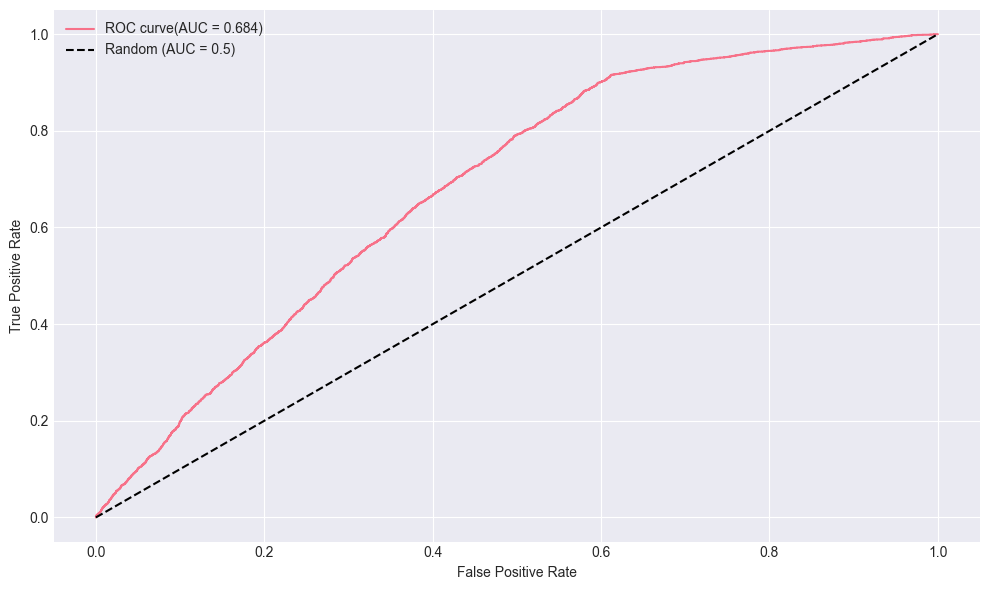

In [29]:
# Model evaluation metrics for the Logistic Regression model with class weights
# Import required libraries
from sklearn.metrics import roc_auc_score, roc_curve

# Create a function to plot ROC curve
def roc_curve_plot(y_test, y_scores, title="ROC Curve"):
    """
    Plots the roc curve
    """
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    plt.plot(fpr, tpr, label=f"ROC curve(AUC = {roc_auc_score(y_test, y_scores):.3f})")
    plt.plot([0, 1], [0, 1],'k--', label="Random (AUC = 0.5)")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.tight_layout()
    plt.show()

# Model 2:
y_scores_log = best_logreg.predict_proba(X_test)[:, 1]
roc_curve_plot(y_test, y_scores_log)


**AUC=0.684** means that, given a random rework and a random good unit, the model ranks the rework higher ~68% of the time. That's to say, in about 68 out of 100 such pairs, the model gives a higher risk score to the bad unit than to the good one.

In [32]:
# Feature Importance
feature_names = X_train.columns

# Using our model 2
coefs = best_logreg.coef_[0]

lr_importance =(
    pd.DataFrame({
        "feature": feature_names,
        "coef": coefs,
        "abs_coef": np.abs(coefs)
    })
    .sort_values("abs_coef", ascending=False)
)

# Top most influential features (by magnitude)
lr_top10 = lr_importance.head(10)
print(lr_top10)

                      feature      coef  abs_coef
23      product_type_Standard -1.073329  1.073329
24  product_category_Flooring  0.935267  0.935267
26    product_category_Stairs  0.904271  0.904271
12             machine_id_M10 -0.361036  0.361036
9              machine_id_M07 -0.268035  0.268035
3               shift_Shift 3  0.265059  0.265059
21             machine_id_M19 -0.263031  0.263031
19             machine_id_M17 -0.246971  0.246971
5              machine_id_M03 -0.198568  0.198568
4              machine_id_M02 -0.169186  0.169186


**Observations:**
- The feature that considerably reduces rework risk is reproduct_type_Standard. Therefore, a standard order strongly reduces the odds of rework compare to a custom one.  
- The features that considerably increase rework risk are isproduct_category_Flooring and product_category_Stairs.
- We can also see that there are some machines that reduce rework risk such as M10, M07, M19, M17, M03, and M02.
- Shift 3 somehow increases rework risk meaning that night shift has higher rework risk than the reference shift (1).

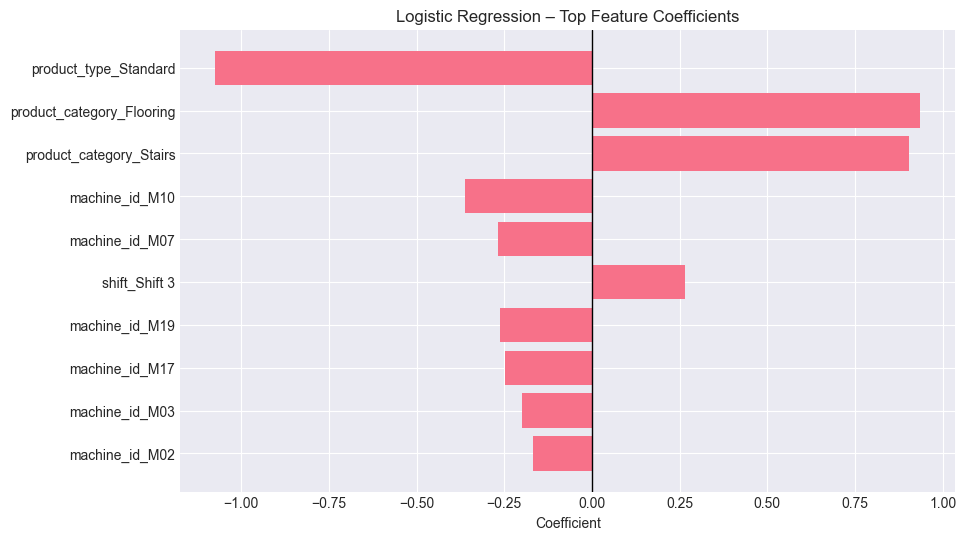

In [33]:
# Feature Importance Graph
plt.barh(lr_top10["feature"], lr_top10["coef"])
plt.axvline(0, color="k", linewidth=1)
plt.gca().invert_yaxis()
plt.title("Logistic Regression – Top Feature Coefficients")
plt.xlabel("Coefficient")
plt.show()

### 1.3. Model 3 Random Forest 

In [26]:
# Import the required libraries
from sklearn.ensemble import RandomForestClassifier

# Model instance
randforest = RandomForestClassifier(
    n_estimators=300, 
    max_depth=10,
    min_samples_split=50,
    min_samples_leaf=20,
    max_features= 'sqrt',
    class_weight={0: 1, 1:3},
    n_jobs=1, 
    random_state=42)

# Train the model
randforest.fit(X_train, y_train)

# Predict
y_pred = randforest.predict(X_test)

# Evaluate the model and print results
print(f'Accuracy Score:', accuracy_score(y_test, y_pred))
print(f'Precision Score:', precision_score(y_test, y_pred) )
print(f'Recall Score:', recall_score(y_test, y_pred) )
print(f'F1 Score:', f1_score(y_test, y_pred))
print(f'Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy Score: 0.5383771929824561
Precision Score: 0.3737571951857666
Recall Score: 0.9151185137732223
F1 Score: 0.5307449377670443
Confusion Matrix:
 [[3035 4787]
 [ 265 2857]]


**Observations:**
Confusion Matrix:

- TN: 3035 parts correctly predicted
- FP: 4787 good parts flagged as rework
- FN: 265 rework parts missed 
- TP: 2857 rework parts caught

Using Random Forest (RF), the RF model accuracy was 54%, which is lower than the 57% achieved using a Logistic Regression model. However, now we are catching 91.51% of the bad units, meaning we went from roughly 83% to about 92%.


### 1.4. Model 4 Random Forest Tuned

In [45]:
# Import the required libraries
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Model instance
randforest = RandomForestClassifier(
    n_jobs=1, 
    random_state=42
)

# Hyperparameter search focus on C and class_weight
param_dist ={
    "n_estimators": [200, 300, 400],
    "max_depth": [8, 10, 12, None],
    "min_samples_leaf": [10, 20, 50],
    "class_weight": ['balanced', {0:1, 1:2}, {0:1, 1:3}]
}
# Search
randforest_search = RandomizedSearchCV(
    estimator=randforest,
    param_distributions=param_dist,
    n_iter=15,
    scoring='f1',
    cv=3,
    n_jobs=-1,
    random_state=42
)

# Train the model
randforest_search.fit(X_train, y_train)
best_randforest = randforest_search.best_estimator_
print("Best params:", randforest_search.best_params_)

# Predict
y_pred_ran = randforest_search.predict(X_test)

# Metrics
accuracy_rf = accuracy_score(y_test, y_pred_ran)
precision_rf = precision_score(y_test, y_pred_ran)
recall_rf = recall_score(y_test, y_pred_ran)
f1_rf = f1_score(y_test, y_pred_ran)

# Evaluate the model and print results
print(f'Accuracy Score: {accuracy_rf}')
print(f'Precision Score: {precision_rf}')
print(f'Recall Score: {recall_rf}')
print(f'F1 Score: {f1_rf}')
print(f'Confusion Matrix:\n', confusion_matrix(y_test, y_pred_ran))

Best params: {'n_estimators': 400, 'min_samples_leaf': 10, 'max_depth': 10, 'class_weight': {0: 1, 1: 3}}
Accuracy Score: 0.5391081871345029
Precision Score: 0.37398373983739835
Recall Score: 0.9135169762972454
F1 Score: 0.530703386676591
Confusion Matrix:
 [[3048 4774]
 [ 270 2852]]


**Observations:**
Confusion Matrix:

- TN: 3048 parts correctly predicted
- FP: 4774 good parts flagged as rework
- FN: 270 rework parts missed 
- TP: 2852 rework parts caught

The model's accuracy stayed the same 54% and the TP decreased to 91.35%.

**Final Observation:**
Random Forest slightly improves the F1 score and significantly increases recall, which is our target. We want to know out of all the units that truly belong to the rework class, what fraction the model successfully caught (TP).

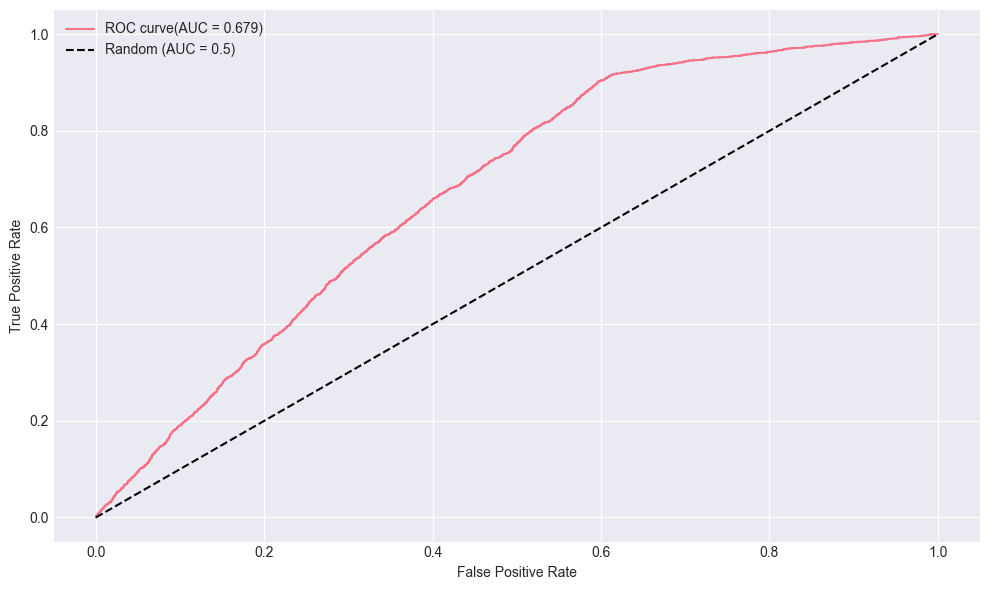

In [30]:
# Plot ROC curve 
y_scores_ran = best_randforest.predict_proba(X_test)[:, 1]
roc_curve_plot(y_test, y_scores_ran)


AUC is 0.679, it means that in about 68 out of 100 such pairs,the model gives a higher risk score to the bad unit than to the good one.

In [34]:
# Feature importance 
rf_importance =(
    pd.DataFrame({
        "feature": feature_names,
        "importance": best_randforest.feature_importances_,
    })
    .sort_values("importance", ascending=False)
)
# Top 10
rf_top10 = rf_importance.head(10)
print(rf_top10)

                        feature  importance
0                    cycle_time    0.549205
23        product_type_Standard    0.200149
24    product_category_Flooring    0.055969
26      product_category_Stairs    0.052543
1              production_month    0.033125
25  product_category_Partitions    0.021817
27       product_category_Walls    0.019754
3                 shift_Shift 3    0.018147
2                 shift_Shift 2    0.008348
12               machine_id_M10    0.004064


**Observations:**
- Over half of the model’s “decision power” comes from overall cycle time. 
- Being standard vs custom is the second most influential signal.
- Features: production_month, product_category_Partitions/Walls, shifts, machine M10 are weak contributors, meaning they fine-tune the decision, but don’t drive it.

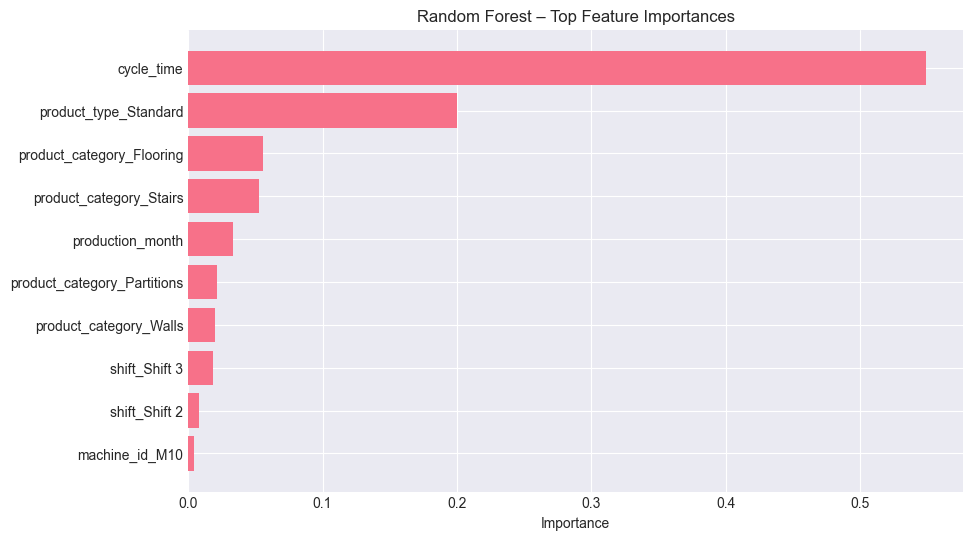

In [35]:
# Graph feature importance
plt.barh(rf_top10["feature"], rf_top10["importance"])
plt.gca().invert_yaxis()
plt.title("Random Forest – Top Feature Importances")
plt.xlabel("Importance")
plt.show()

**Final Observation:**
Both models, LR and RF, agree that overall cycle time is the dominant signal for rework risk, but even after controlling for cycle time, standard vs. custom work, product category (especially Flooring/Stairs), and night shift still add meaningful predictive power.

In [ ]:
# Model Selection 
# Model Comparison Table
model_comparison = pd.DataFrame({
    "Model": ["Logistic Regression (class_weighted)", "Random Forest (tuned)"],
    "Accuracy": [accuracy_lg, accuracy_rf],
    "Precision": [precision_lg, precision_rf], 
    "Recall": [recall_lg, recall_rf],
    "F1": [f1_lg, f1_rf]
})

model_comparison

,Model,Accuracy,Precision,Recall,F1
0,Logistic Regression (class_weighted),0.566703,0.380707,0.827995,0.521590
1,Random Forest (tuned),0.539108,0.373984,0.913517,0.530703


In [ ]:
# Get the markdown version for GitHub Display
from IPython.display import Markdown

Markdown(model_comparison.to_markdown(index=False))

| Model                                |   Accuracy |   Precision |   Recall |       F1 |
|:-------------------------------------|-----------:|------------:|---------:|---------:|
| Logistic Regression (class_weighted) |   0.566703 |    0.380707 | 0.827995 | 0.52159  |
| Random Forest (tuned)                |   0.539108 |    0.373984 | 0.913517 | 0.530703 |


From a business stand point, the main goal is to catch as many bad units as possible before they leave the line. Therefore, "Recall" is our priority, since missing a defective unit (false negative) is more costly than over-flagging a good unit. 

- The tuned Random Forest (RF) model catches about 91% of the rework units vs 83% for the Logistic Regression (LG) model.
- F1 is slightly better for RF, meaning it balances precision/recall a bit better for the rework class.
- Interpretability vs Performance: 
     - LG is kept as a baseline and explanation tool since it has clear coefficients showing how standard vs custom, flooring/stairs, and shift 3 affect risk.
     - RF is used as the operational model because it handles non-linear interactions and gives the best recall on rework risk, even with similar ROC-AUC.

**Conclusion:**
I use Logistic Regression as a transparent benchmark, but deploy the tuned Random Forest as the main “rework risk” model because it maximizes recall on bad parts while maintaining comparable overall performance.

## 2. Predicting Rework Reason

### 2.1. Random Forest

In [136]:
# Import required libraries to train the model 
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 1. Filter data so we only keep data related to failed units
fails = data[data['rework_flag'] == 1].copy()

# 2. Select independent features to use during model training
features = ['cycle_time',
            'cutting_time',
            'framing_time',
            'tempering_time', 
            'shift', 
            'machine_id', 
            'product_type', 
            'product_category', 
            'production_month']

# 3. Encode categorical variables and divide data into X and y
X = pd.get_dummies(fails[features], drop_first=True) # To avoid perfectly collinear dummy vars
y = fails['rework_reason']

# 4. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20,random_state=4, stratify=y) # Stratify so the train/test split keeps the same rework rate

# 5. Model
randforest = RandomForestClassifier(
    n_estimators=300,
    n_jobs=1, 
    random_state=42
)

# 5.1. Hyperparameter search focus on C and class_weight
param_dist ={
    "n_estimators": [200, 400, 600],
    "max_depth": [None, 10, 15, 20],
    "min_samples_split": [2, 10, 30, 60],
    "min_samples_leaf": [1, 3, 10, 20],
    "class_weight": [None, 'balanced', {0:1, 1:2, 2:2, 3:3, 4:1, 5:1, 6:3, 7:3, 8:3}]
}
# 5.2 Search
randforest_search = RandomizedSearchCV(
    estimator=randforest,
    param_distributions=param_dist,
    n_iter=25,
    scoring='f1_weighted',
    cv=3,
    n_jobs=-1,
    random_state=42,
    verbose=1
)
# 6. Train the model
randforest_search.fit(X_train, y_train)
best_randforest = randforest_search.best_estimator_
print("Best params:", randforest_search.best_params_)

# 7. Make predictions
y_pred = randforest_search.predict(X_test)

# 8. Evaluate the model 
print("Test Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Fitting 3 folds for each of 25 candidates, totalling 75 fits


/Users/AndreaLopera/.global-venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
30 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/AndreaLopera/.global-venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/AndreaLopera/.global-venv/lib/python3.9/site-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/AndreaLopera/.global-venv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 419, in fit

Best params: {'n_estimators': 600, 'min_samples_split': 10, 'min_samples_leaf': 10, 'max_depth': None, 'class_weight': None}
Test Classification Report:
                               precision    recall  f1-score   support

               Contamination       0.38      0.20      0.26        25
Design / Specification Issue       0.00      0.00      0.00       156
                   Edge chip       0.45      0.51      0.48      1108
    Fatigue / Shift Pressure       0.68      1.00      0.81        72
        Incorrect dimensions       0.41      0.47      0.44      1095
         Machine Malfunction       0.92      0.95      0.93       469
             Material Defect       0.00      0.00      0.00       156
            Misaligned frame       0.50      0.06      0.10        18
             Scratched glass       0.00      0.00      0.00        23

                    accuracy                           0.51      3122
                   macro avg       0.37      0.35      0.34      3122
    

/Users/AndreaLopera/.global-venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/AndreaLopera/.global-venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/AndreaLopera/.global-venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

**Observations:**
- Overall, the accuracy 51% on failing units; therefore, it gets the root cause right about half the time. 
- Macro F1=0.34, meaning all classes are doing badly (it treats all classes equally).
- Weighted F1=0.48

**Strong Classes**
Confusion Matrix:
- Machine Malfunction: TP=447, FN=22 (6th row) > 447/469 correct. Meaning we can trust it.
    - Precision 92% 
    - Recall 95%
    - F1 93%

- Fatigue / Shift Pressure: TP=72, FN=0 > 72/72 correct. Meaning we can trust it.
    - Precision 68% 
    - Recall 100%
    - F1 81%
- The Macro F1 Score is 34% on average across classes meaning that all classes are doing badly (performance is low).

Although our Random Forest model is appropriate for a few key causes, such as 'Machine Malfunction' and 'Fatigue / Shift Pressure'. It does reasonably well for 'Edge chip' and 'Incorrect dimensions.' Still, it's not suitable for distinguishing the rare, subtle classes with so little data per label.


### 2.2 Random Forest with 3 higher-level buckets

In [43]:
# Import required libraries to train the model 
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 1. Filter data so we only keep data related to failed units
fails = data[data['rework_flag'] == 1].copy()

# 2. Rework reasons into 3–4 higher-level buckets and re-train the root-cause model
rework_reason_dic = {
      'Dimensional / Assembly Issues': ['Edge chip', 'Incorrect dimensions', 'Misaligned frame','Design / Specification Issue'],
      'Surface / Material Defects': ['Scratched glass', 'Contamination', 'Material Defect'],
      'Equipment / Human Factors': ['Machine Malfunction', 'Fatigue / Shift Pressure'], 
}

def assign_rework_reason(original_reason, rework_reason_dic):
    """
    Maps an original (low_level) reason to its high-level bucket.
    """
    # Iterate through the high-level buckets (key) and their list of reasons
    for bucket_key, reasons_list in rework_reason_dic.items():
        if original_reason in reasons_list:
            return bucket_key
    # If reason is not found un any bucket
    return 'Other / Uncategorized'

fails['rework_group'] = fails['rework_reason'].apply(
    lambda x: assign_rework_reason(x, rework_reason_dic)
)

# 3. Select independent features to use during model training
features = ['cycle_time',
            'cutting_time',
            'framing_time',
            'tempering_time', 
            'shift', 
            'machine_id', 
            'product_type', 
            'product_category', 
            'production_month']

# 4. Encode categorical variables and divide data into X and y
X = pd.get_dummies(fails[features], drop_first=True) # To avoid perfectly collinear dummy vars
y = fails['rework_group']

# 5. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20,random_state=4, stratify=y) # Stratify so the train/test split keeps the same rework rate

# 6. Model
randforest = RandomForestClassifier(
    n_estimators=300,
    n_jobs=1, 
    random_state=42
)

# 6.1. Hyperparameter search focus on C and class_weight
param_dist ={
    "n_estimators": [200, 400, 600],
    "max_depth": [None, 10, 15, 20],
    "min_samples_split": [2, 10, 30, 60],
    "min_samples_leaf": [1, 3, 10, 20],
    "class_weight": [None, 'balanced', {0:1, 1:2, 2:2, 3:3, 4:1, 5:1, 6:3, 7:3, 8:3}]
}
# 6.2 Search
randforest_search = RandomizedSearchCV(
    estimator=randforest,
    param_distributions=param_dist,
    n_iter=25,
    scoring='f1_weighted',
    cv=3,
    n_jobs=-1,
    random_state=42,
    verbose=1
)
# 7. Train the model
randforest_search.fit(X_train, y_train)
best_randforest_rework_reason = randforest_search.best_estimator_
print("Best params:", randforest_search.best_params_)

# 8. Make predictions
y_pred_ran_rework_reasons = randforest_search.predict(X_test)

# 9. Evaluate the model 
print("Test Classification Report:\n", classification_report(y_test, y_pred_ran_rework_reasons))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ran_rework_reasons))

Fitting 3 folds for each of 25 candidates, totalling 75 fits


/Users/AndreaLopera/.global-venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
30 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/AndreaLopera/.global-venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/AndreaLopera/.global-venv/lib/python3.9/site-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/AndreaLopera/.global-venv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 419, in fit

Best params: {'n_estimators': 200, 'min_samples_split': 30, 'min_samples_leaf': 20, 'max_depth': None, 'class_weight': 'balanced'}
Test Classification Report:
                                precision    recall  f1-score   support

Dimensional / Assembly Issues       0.95      0.93      0.94      2377
    Equipment / Human Factors       0.89      0.98      0.93       541
   Surface / Material Defects       0.33      0.30      0.32       204

                     accuracy                           0.90      3122
                    macro avg       0.72      0.74      0.73      3122
                 weighted avg       0.90      0.90      0.90      3122

Confusion Matrix:
 [[2219   45  113]
 [   4  528    9]
 [ 121   22   61]]


**Observations:**
- Grouping the rework reasons into 4 big groups/buckets and retraining our last RF model, we obtained an overall accuracy of 90% on failed units.  
    - The bucket 'Dimensional / Assembly Issues' obtained a precision score of 95%, a recall of 93%, and an F1 score of 94%. Meaning that out of 2,377 cases, 2,219 were correctly classified. According to these results, the model rarely misclassifies these units.
    - Equipment / Human Factors achieved a precision of 89%, a recall of 98%, and an F1 score of 93%; out of 541 cases, 528 we correctly classified, so based on these results, the model almost never misses these causes.
 Therefore, **the model reliably distinguishes Dimensional/Assembly vs. Equipment/Human causes for rework.**
    - In terms of the third bucket, 'Surface / Material Defects', results are considerably less promising. We obtained precision of 33%, a recall of 30%, and an F1 of 32%. That's to say, out of 204 cases, only 61 were correctly classified, and many are absorbed into the other two buckets, so the model struggles to reliably isolate these defects: 'Scratched glass', 'Contamination', and 'Material Defect.'


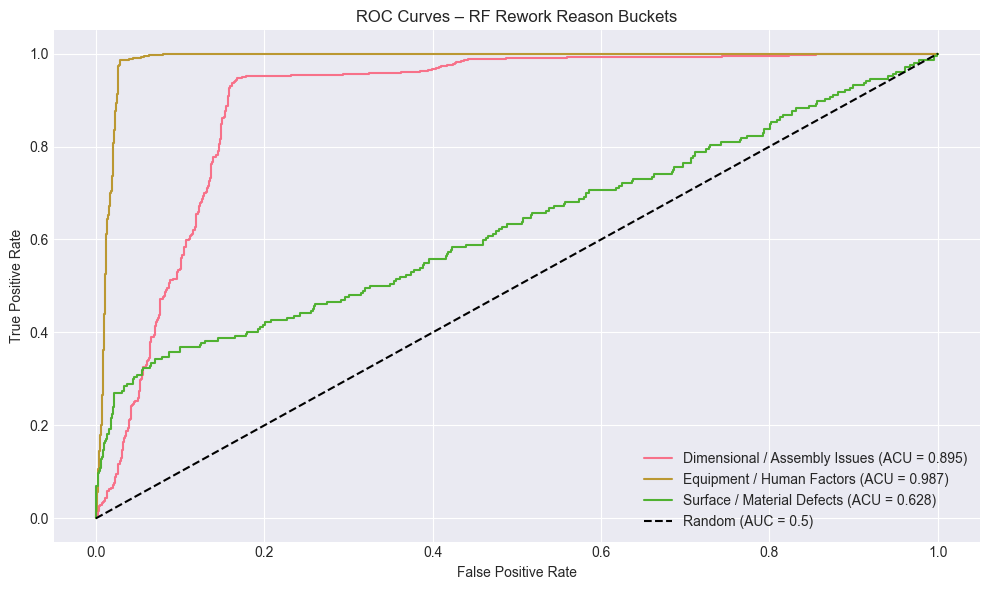

In [39]:
# ROC Curve for multi-class
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Get class order from the model
class_names = best_randforest_rework_reason.classes_

# Binariza y_test into one column per class
y_test_bin = label_binarize(y_test, classes=class_names)

# Predict probabilities for each class
y_prob = best_randforest_rework_reason.predict_proba(X_test)

# Plot one ROC curve per class
for i, cls in enumerate(class_names):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{cls} (ACU = {roc_auc:.3f})")

# Random baseline
plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.5)')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves – RF Rework Reason Buckets")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

**Observations:**
- The model discriminates "Equipment / Human Factors" extremely well with the highest AUC (Area Under the Curve) score of 0.99. That means if you pick one unit whose true bucket is "Equipment / Human Factors" and whose bucket is something else, the model assigns a higher probability to the correct one about 99% of the time. 
- As second place, we had "Dimensional / Assembly Issues" with a score of roughly 0.90. The model can reliably separate this bucket from the others.
- In the final place, we can see "Surface / Material Defects" with a score of 0.63. The model struggles to separate these defects from the other two buckets cleanly. 

Therefore, we can conclude that when the RF model is very good at distinguishing between Equipment/Human and Dimensional/Assembly rework, it is only modestly successful at isolating Surface/Material defects.

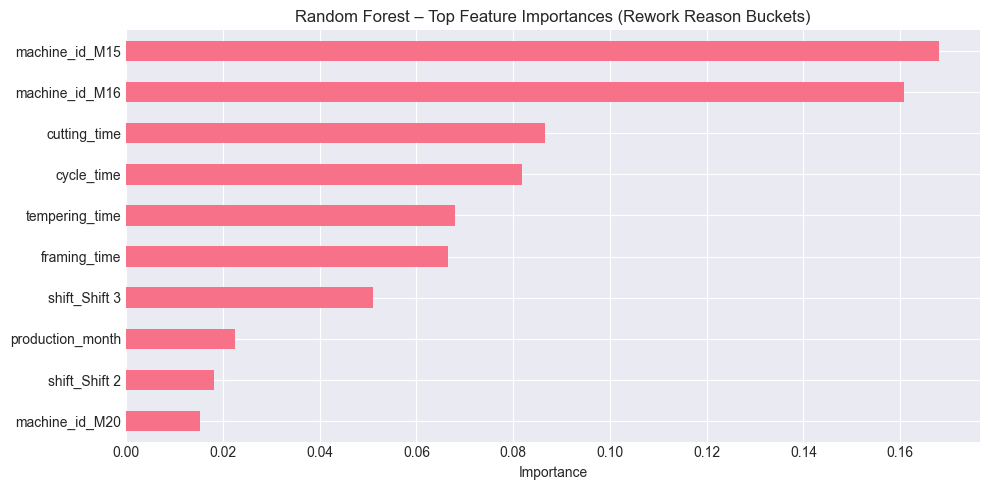

machine_id_M15      0.168076
machine_id_M16      0.160760
cutting_time        0.086571
cycle_time          0.081877
tempering_time      0.067955
framing_time        0.066611
shift_Shift 3       0.050983
production_month    0.022495
shift_Shift 2       0.018128
machine_id_M20      0.015228
dtype: float64


In [40]:
# Feature Importance
importances = best_randforest_rework_reason.feature_importances_
feature_names = X_train.columns 

feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Top 10 
top_n = 10
top_feat = feat_imp.head(top_n)

plt.figure(figsize=(10, 5))
top_feat.sort_values().plot(kind='barh')
plt.xlabel("Importance")
plt.title("Random Forest – Top Feature Importances (Rework Reason Buckets)")
plt.tight_layout()
plt.show()

print(top_feat)

**Observations:**
- The strongest drivers of predicted rework bucket are machine_id_M15 and machine_id_M16. The model has learned that when a unit comes from M15 and M16, the type of rework needed is more predictable than other machines (It uses those two machines as early decision splits in the trees.)
- Process times (cutting_time, cycle_time, tempering_time, framing_time) together contribute a substantial share of importance, meaning how long the unit spends in each stage helps the model distinguish the type of rework needed.
- Shift 3 and, to a lesser extent, Shift 2 also matter, indicating that time-of-day / staffing patterns influence which kind of defect tends to occur.
- Production month and machine M20 have smaller importance, acting more as fine-tuning signals rather than primary drivers.


The model is effectively telling us that machine identity itself is a strong signal of what kind of defect we get, not just whether we get a defect. In a real plant, that would point to machine-specific corrective actions (maintenance, calibration, operator training) rather than generic “quality is bad” fixes.